In [1]:
!pip uninstall tensorflow
!pip install tensorflow-gpu==1.15 --upgrade

Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-2.2.0
     |████████████████████████████████| 411.5MB 42kB/s 
     |████████████████████████████████| 512kB 40.9MB/s 
     |████████████████████████████████| 3.8MB 47.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=9284be475456e0e38a4d165bd6c6acb2a4d0d90f8ef9d31362dff67162d0f888
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll hav

In [0]:
!pip install keras --upgrade

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)


In [0]:
import tensorflow
tensorflow.__version__

'1.15.0'

## Loading data from kaggle

In [0]:
!mkdir ~/.kaggle

In [0]:
import json
token = {
    "username":"bashisthasudeep", # replace with your username
    "key":"" # replace with your key
    }
with open("/root/.kaggle/kaggle.json", "w") as file:
    json.dump(token, file)

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d grassknoted/asl-alphabet -p ./asl_alphabet

 98% 1.01G/1.03G [00:15<00:00, 50.2MB/s]
100% 1.03G/1.03G [00:15<00:00, 71.1MB/s]


In [0]:
!unzip asl_alphabet/asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing191.jpg  
  inflating: asl_alphabet_t

## visualize Data

Samples images for letter A


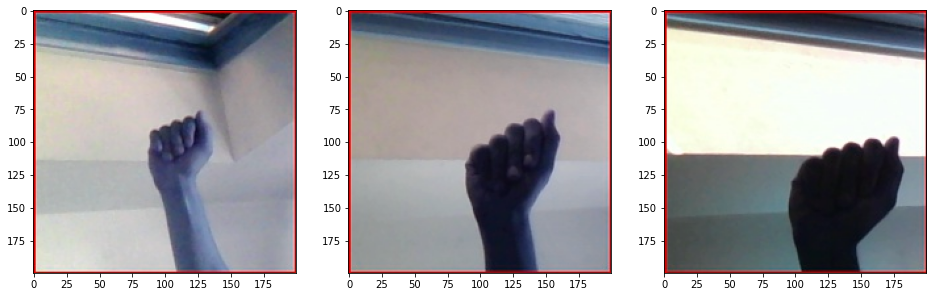

In [0]:
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

# ensure consistency across runs
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

# Imports to view data
import cv2
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random

def plot_three_samples(letter):
    print("Samples images for letter " + letter)
    base_path = 'asl_alphabet_train/asl_alphabet_train/'
    img_path = base_path + letter + '/**'
    path_contents = glob(img_path)
    
    plt.figure(figsize=(16,16))
    imgs = random.sample(path_contents, 3)
    plt.subplot(131)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(imgs[2]))
    return

plot_three_samples('A')

## apply augmentation and data loader

In [0]:
data_dir = "asl_alphabet_train/asl_alphabet_train"
target_size = (229, 229)
target_dims = (229, 229, 3) # add channel for RGB
n_classes = 29
val_frac = 0.1
batch_size = 16

data_augmentor = ImageDataGenerator(
        rescale=1/255.0,
        samplewise_center=True, 
        samplewise_std_normalization=True, 
        validation_split=val_frac,
        horizontal_flip=True,
        rotation_range=10,
        )

train_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, shuffle=True, subset="training")
val_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, subset="validation")

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


## creating model

In [0]:
from keras.applications import InceptionV3
from keras.layers import Dropout
from keras.models import Model

pretrained_model = InceptionV3(include_top=False, input_shape=target_dims, weights="imagenet")

# pretrained_model.trainable = False

x = pretrained_model.output
x = Flatten()(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x)
predictions = Dense(29, activation='softmax')(x)
model = Model(inputs=pretrained_model.input, outputs=predictions)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


87916544/87910968 [==============================] - 2s 0us/step


## setting parameters

In [0]:
import keras
model.compile(
    optimizer="adam", 
    loss=keras.losses.categorical_crossentropy, 
    metrics = ["accuracy"]
)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 229, 229, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 114, 114, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 114, 114, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 114, 114, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

## resume training

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp -r /content/drive/My\ Drive/client-data/asl.h5 .

In [0]:
model.load_weights('/content/asl.h5')

## start training

In [0]:
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=4, verbose=1)]
history = model.fit_generator(train_generator, epochs=10, validation_data=val_generator, verbose=1,callbacks =callbacks_list)

Epoch 1/10
9788/9788 [==============================] - 1473s 150ms/step - loss: 2.3882 - accuracy: 0.3307 - val_loss: 0.7913 - val_accuracy: 0.6997
Epoch 2/10
   1/9788 [..............................] - ETA: 20:46 - loss: 0.4550 - accuracy: 0.8750

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


9788/9788 [==============================] - 1446s 148ms/step - loss: 0.4748 - accuracy: 0.8431 - val_loss: 2.8943 - val_accuracy: 0.7686
Epoch 3/10
9788/9788 [==============================] - 1447s 148ms/step - loss: 0.1965 - accuracy: 0.9354 - val_loss: 0.0573 - val_accuracy: 0.9102
Epoch 4/10
9788/9788 [==============================] - 1470s 150ms/step - loss: 0.1133 - accuracy: 0.9624 - val_loss: 3.8212e-04 - val_accuracy: 0.9390
Epoch 5/10
9788/9788 [==============================] - 1457s 149ms/step - loss: 0.0929 - accuracy: 0.9704 - val_loss: 0.0023 - val_accuracy: 0.9486
Epoch 6/10
9788/9788 [==============================] - 1460s 149ms/step - loss: 0.0665 - accuracy: 0.9784 - val_loss: 1.6520 - val_accuracy: 0.9214
Epoch 7/10
9788/9788 [==============================] - 1454s 149ms/step - loss: 0.0554 - accuracy: 0.9824 - val_loss: 4.1723e-07 - val_accuracy: 0.9403
Epoch 8/10
9788/9788 [==============================] - 1451s 148ms/step - loss: 0.0467 - accuracy: 0.9858 - 

In [0]:
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=4, verbose=1)]
history = model.fit_generator(train_generator, epochs=10, validation_data=val_generator, verbose=1,callbacks =callbacks_list)


Epoch 1/10
4894/4894 [==============================] - 1254s 256ms/step - loss: 0.0177 - accuracy: 0.9949 - val_loss: 0.0172 - val_accuracy: 0.9672
Epoch 2/10
   1/4894 [..............................] - ETA: 11:15 - loss: 0.0127 - accuracy: 1.0000

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


4894/4894 [==============================] - 1194s 244ms/step - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.1920 - val_accuracy: 0.9566
Epoch 3/10
4894/4894 [==============================] - 1189s 243ms/step - loss: 0.0123 - accuracy: 0.9962 - val_loss: 2.7407e-04 - val_accuracy: 0.9546
Epoch 4/10
4894/4894 [==============================] - 1202s 246ms/step - loss: 0.0121 - accuracy: 0.9962 - val_loss: 5.4040e-06 - val_accuracy: 0.9403
Epoch 5/10
4894/4894 [==============================] - 1190s 243ms/step - loss: 0.0117 - accuracy: 0.9963 - val_loss: 7.4595e-05 - val_accuracy: 0.9580
Epoch 6/10
4894/4894 [==============================] - 1191s 243ms/step - loss: 0.0107 - accuracy: 0.9968 - val_loss: 2.5536 - val_accuracy: 0.9495
Epoch 7/10
4894/4894 [==============================] - 1214s 248ms/step - loss: 0.0112 - accuracy: 0.9967 - val_loss: 1.5363e-04 - val_accuracy: 0.9685
Epoch 8/10
4894/4894 [==============================] - 1231s 252ms/step - loss: 0.0087 - accuracy: 0

## Saving weights

In [0]:
model.save_weights('asl.h5')

In [0]:
history.history

{'accuracy': [0.33074075,
  0.8430779,
  0.93542784,
  0.96237546,
  0.97043425,
  0.97842914,
  0.9824266,
  0.985811,
  0.98541504,
  0.9886462],
 'loss': [2.388128008117012,
  0.4747504228180974,
  0.19636977354937252,
  0.11330859640400161,
  0.09292828257545924,
  0.06649023665066665,
  0.05540852750148609,
  0.046453499127730995,
  0.046811924528673415,
  0.035784711813069255],
 'val_accuracy': [0.6996551752090454,
  0.7686206698417664,
  0.9102298617362976,
  0.9389654994010925,
  0.9486206769943237,
  0.9213793277740479,
  0.9403448104858398,
  0.9420689940452576,
  0.8451724052429199,
  0.9467816352844238],
 'val_loss': [0.791314423084259,
  2.894341230392456,
  0.05728410929441452,
  0.00038211903301998973,
  0.002267199568450451,
  1.6520380973815918,
  4.1723228605405893e-07,
  0.0003428789786994457,
  0.016181690618395805,
  2.7363808155059814]}

In [0]:
history.history

{'accuracy': [0.99489146,
  0.9962452,
  0.99616855,
  0.99618137,
  0.9963346,
  0.9967944,
  0.9966794,
  0.99734354,
  0.99717754,
  0.9971903],
 'loss': [0.01770729944318483,
  0.012829992151050159,
  0.012271042943298338,
  0.012117158479463907,
  0.011696721428912333,
  0.010700964260811645,
  0.01123765043193691,
  0.008657178687914425,
  0.009248226335142145,
  0.00956278019640562],
 'val_accuracy': [0.9672414064407349,
  0.956551730632782,
  0.9545977115631104,
  0.9403448104858398,
  0.9580459594726562,
  0.9495402574539185,
  0.9685057401657104,
  0.9520689845085144,
  0.9666666388511658,
  0.9601149559020996],
 'val_loss': [0.017208052799105644,
  0.1920086145401001,
  0.000274069607257843,
  5.403982413554331e-06,
  7.459480548277497e-05,
  2.553618907928467,
  0.00015362929843831807,
  0.6973642706871033,
  4.991695404052734,
  5.518720718100667e-05]}

In [0]:
history_prev = {'accuracy': [0.33074075,
  0.8430779,
  0.93542784,
  0.96237546,
  0.97043425,
  0.97842914,
  0.9824266,
  0.985811,
  0.98541504,
  0.9886462],
 'loss': [2.388128008117012,
  0.4747504228180974,
  0.19636977354937252,
  0.11330859640400161,
  0.09292828257545924,
  0.06649023665066665,
  0.05540852750148609,
  0.046453499127730995,
  0.046811924528673415,
  0.035784711813069255],
 'val_accuracy': [0.6996551752090454,
  0.7686206698417664,
  0.9102298617362976,
  0.9389654994010925,
  0.9486206769943237,
  0.9213793277740479,
  0.9403448104858398,
  0.9420689940452576,
  0.8451724052429199,
  0.9467816352844238],
 'val_loss': [0.791314423084259,
  2.894341230392456,
  0.05728410929441452,
  0.00038211903301998973,
  0.002267199568450451,
  1.6520380973815918,
  4.1723228605405893e-07,
  0.0003428789786994457,
  0.016181690618395805,
  2.7363808155059814]}

In [0]:
vals_loss = history.history['val_loss'] + history_prev['val_loss']
vals_acc = history.history['val_accuracy'] + history_prev['val_accuracy']

train_loss = history.history['loss'] + history_prev['loss']
train_acc = history.history['accuracy'] + history_prev['accuracy']

## visualize LOSS and accuracy

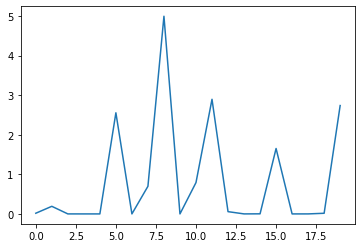

In [0]:
# vals_loss = history.history['val_loss']
# vals_acc = history.history['val_accuracy']

import matplotlib.pyplot as plt
plt.plot(list(range(len(vals_loss))), vals_loss)

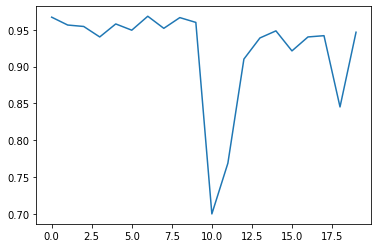

In [0]:
import matplotlib.pyplot as plt
plt.plot(list(range(len(vals_acc))), vals_acc)

## generate confussion metrix

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [0]:
val_generator_ = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, subset="validation")

Found 8700 images belonging to 29 classes.


In [0]:
Y_pred = model.predict_generator(val_generator_, 8700// batch_size+1)

In [0]:
import pandas as pd
y_pred = np.argmax(Y_pred, axis=1)
print(val_generator_.classes.shape, y_pred.shape, val_generator_.classes, y_pred)
print(pd.value_counts(val_generator_.classes==y_pred))
print(pd.value_counts(val_generator_.classes))
print(pd.value_counts(y_pred))

(8700,) (8700,) [ 0  0  0 ... 28 28 28] [22  8 14 ... 13  4 28]
False    8378
True      322
dtype: int64
23    300
11    300
8     300
16    300
24    300
1     300
9     300
17    300
25    300
2     300
10    300
18    300
26    300
3     300
19    300
15    300
27    300
4     300
12    300
20    300
28    300
5     300
13    300
21    300
6     300
14    300
22    300
7     300
0     300
dtype: int64
20    421
18    345
4     333
28    315
12    314
3     305
22    303
10    303
5     302
2     301
0     301
11    300
24    299
21    299
25    299
6     297
15    295
1     294
17    292
13    291
26    287
9     285
14    284
8     282
19    282
27    280
23    275
16    268
7     248
dtype: int64


In [0]:
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_generator_.classes, y_pred))
print('Classification Report')
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}
print(classification_report(val_generator_.classes, y_pred, target_names=list(labels_dict.keys())))

Confusion Matrix
[[ 9  9  7  7  9 14 14  9 19  9 10 12  8 10  8 19  5  7 13  6 11 10 10  7
  12 13  9 10 14]
 [ 9 12  7  9 15 13  5 14 10 12 10  8 13  6 10 16 15 11 10  5  8 10 10  8
  13 12  7 12 10]
 [12  9  9  7 11  7  8  9 13  8 14 10 12 10 12 13  9 10 12 14 10 10 10 13
  11 12  9 12  4]
 [18 11 10  6 10 15  6 12  9  9  4  7 12 13 11 15 14 11 13 11  5 15 10  9
  12 10  8  9  5]
 [12  7 13  6 14 11  9  8 10 11 10 10 12  8 13  7  8 11 11 10  8  2 10 11
  15  8 13 15 17]
 [ 7 10  8 11 17 11 13 10  8  7  6 14 11  8 10  7 10  7 13  9 13  7 12 13
  13 12 11  9 13]
 [11 12  8 13  9  9 10 14  8  9 10 12 13 14 11 12 10 13 15  2  9 11  7  8
  11 11  5 17  6]
 [11  9 10 11 14 10 12 13 12 12 10  7  8 11 14  7 14 13  7  5  7  5 11  9
   6  9 11 17 15]
 [16  6 12 13 10 13  8 14  9  6 13  8  7  7 10 14  8  4 11 11 10  8  9 12
  10 13  8 18 12]
 [11 15 12 13 10  8  9 14  2 12 11 10  9 12  7  7 10 10 10 10  9 13 12  7
   6 15 10 13 13]
 [12 13  8 13 12 10 16  9 10  6  9 15  9 10 14 12 10 11 12 10 1

## visualization with plotly

In [0]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}

In [0]:
history = {'accuracy': [0.33074075,
  0.8430779,
  0.93542784,
  0.96237546,
  0.97043425,
  0.97842914,
  0.9824266,
  0.985811,
  0.98541504,
  0.9886462],
 'loss': [2.388128008117012,
  0.4747504228180974,
  0.19636977354937252,
  0.11330859640400161,
  0.09292828257545924,
  0.06649023665066665,
  0.05540852750148609,
  0.046453499127730995,
  0.046811924528673415,
  0.035784711813069255],
 'val_accuracy': [0.6996551752090454,
  0.7686206698417664,
  0.9102298617362976,
  0.9389654994010925,
  0.9486206769943237,
  0.9213793277740479,
  0.9403448104858398,
  0.9420689940452576,
  0.8451724052429199,
  0.9467816352844238],
 'val_loss': [0.791314423084259,
  2.894341230392456,
  0.05728410929441452,
  0.00038211903301998973,
  0.002267199568450451,
  1.6520380973815918,
  4.1723228605405893e-07,
  0.0003428789786994457,
  0.016181690618395805,
  2.7363808155059814]}

In [0]:
vals_loss = history['val_loss']
vals_acc = history['val_accuracy']
train_loss = history['loss']
train_acc = history['accuracy']

In [0]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 1+len(vals_loss))), y=vals_loss,
                    mode='lines',
                    name='validation loss'))
fig.add_trace(go.Scatter(x=list(range(1, 1+len(train_loss))), y=train_loss,
                    mode='lines',
                    name='training loss'))

fig.show()

In [0]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 1+len(vals_acc))), y=vals_acc,
                    mode='lines',
                    name='validation loss'))
fig.add_trace(go.Scatter(x=list(range(1, 1+len(train_acc))), y=train_acc,
                    mode='lines',
                    name='training loss'))

fig.show()

In [0]:
# rows = []
# for row in '''
# [11 12  8 13  9  9 10 14  8  9 10 12 13 14 11 12 10 13 15  2  9 11  7  8 11 11  5 17  6],
# [11  9 10 11 14 10 12 13 12 12 10  7  8 11 14  7 14 13  7  5  7  5 11  9 6  9 11 17 15],
# [16  6 12 13 10 13  8 14  9  6 13  8  7  7 10 14  8  4 11 11 10  8  9 12 10 13  8 18 12],
# [11 15 12 13 10  8  9 14  2 12 11 10  9 12  7  7 10 10 10 10  9 13 12  7 6 15 10 13 13],
# [12 13  8 13 12 10 16  9 10  6  9 15  9 10 14 12 10 11 12 10 12  7  6  4 8  9 11 13  9],
# [10 12 10 11  5 11  9  7  9  8 10 16 13  9 13  2 16 15  8  8 16 10  9 10 15  9 10  6 13],
# [13 10 11  9 10  7 13 16  8 13  6 14 10  9 14  9  8  8  9 13 13 13 10  4 7  8  8 16 11],
# [ 9 10 10 10 10 10 10 10  9 13  8 11  8 11 14  9 15 10  8  5 16 10  9 11 15 12  6 12  9],
# [ 9  7  5 10 10  7 13 15 13  9  8 12 12 10  8  9 12  7 14  9  8 10 10 17 13  9 12 10 12],
# [ 7 13  4  9  7 10  8 13  9  9 10  5 10  9 11 10 11 11 12  8 14  7 13  8 15 15  8 21 13],
# [11 13 14 15 13 13  4 15  6 15 11 10 11 12  8  7  9  7 10 13 12  8 12  6 9  9  6 13  8],
# [ 7  9  8 14  8  9 14  8 13 11  6  8 14 12 12 15 14  8 13  5 11  8  6 13 10 11 13  8 12],
# [12 13  7 14 13 10 10 10 10 12  9 13 20 13  9 11  9  8 11  4 15  5  6  6 10  6 11  9 14],
# [10 12 12 10 13 15 11 17  5  6 10  9  6  3  9 13 16 12 10  6 10  6  7  9 8 13 16 16 10],
# [12 12 10  7 10 13 10  6 10 10  9 10 17 10 13 10  8  4 11 17  7 11 11 12 13 11  8  8 10],
# [16  8  8 11  7  3 14  5 10 12 10 13 16 12 12  8 11 12  6  4 14  9  4  8 17  6 16 17 11],
# [15 13 11 12  9 10  5 11 14 11 11 18  8  5 16  9 11  9  9 10  8  4  8 12 11  8  6 16 10],
# [15  9  9  9 12 12 11 11  8  9  8  3 10 10 15  8  5 17 20  7 11  7 12  6 5 10 10 22  9],
# [ 8  6  7  9 11 10 15 12  8 15 13  7 11 14 10  5 10 13  5 12 13  9  9 12 8 14  7 16 11],
# [14 14 12  8  9  8  8 11  8 13 11  7  8 11  9 11  9 13 13  6 14  9 15  5 17 10 10 10  7],
# [ 9  5 17 12 12 11 15  9 12 11  7 12 12 18 11  8  9  5 10  2 12 11 10  9 11  6  9 19  6],
# [13 11 14 16 10 13 11  9  4 12 12  8 11  9 11 11  6  6 13 11 19  6  6  8 9 11 14  7  9],
# [ 5 12 17  5 12 11 11  6 12  9 10 11  7  6  9  9 11 13 13 19 15  7  7  5 11  9 14 17  7]
# '''.split(','):
#     cols = [int(col.strip()) for col in row.strip()[2:-1].strip().split(' ') if col != '']
#     rows.append(cols)
# print(rows)

[[1, 12, 8, 13, 9, 9, 10, 14, 8, 9, 10, 12, 13, 14, 11, 12, 10, 13, 15, 2, 9, 11, 7, 8, 11, 11, 5, 17, 6], [1, 9, 10, 11, 14, 10, 12, 13, 12, 12, 10, 7, 8, 11, 14, 7, 14, 13, 7, 5, 7, 5, 11, 9, 6, 9, 11, 17, 15], [6, 6, 12, 13, 10, 13, 8, 14, 9, 6, 13, 8, 7, 7, 10, 14, 8, 4, 11, 11, 10, 8, 9, 12, 10, 13, 8, 18, 12], [1, 15, 12, 13, 10, 8, 9, 14, 2, 12, 11, 10, 9, 12, 7, 7, 10, 10, 10, 10, 9, 13, 12, 7, 6, 15, 10, 13, 13], [2, 13, 8, 13, 12, 10, 16, 9, 10, 6, 9, 15, 9, 10, 14, 12, 10, 11, 12, 10, 12, 7, 6, 4, 8, 9, 11, 13, 9], [0, 12, 10, 11, 5, 11, 9, 7, 9, 8, 10, 16, 13, 9, 13, 2, 16, 15, 8, 8, 16, 10, 9, 10, 15, 9, 10, 6, 13], [3, 10, 11, 9, 10, 7, 13, 16, 8, 13, 6, 14, 10, 9, 14, 9, 8, 8, 9, 13, 13, 13, 10, 4, 7, 8, 8, 16, 11], [9, 10, 10, 10, 10, 10, 10, 10, 9, 13, 8, 11, 8, 11, 14, 9, 15, 10, 8, 5, 16, 10, 9, 11, 15, 12, 6, 12, 9], [9, 7, 5, 10, 10, 7, 13, 15, 13, 9, 8, 12, 12, 10, 8, 9, 12, 7, 14, 9, 8, 10, 10, 17, 13, 9, 12, 10, 12], [7, 13, 4, 9, 7, 10, 8, 13, 9, 9, 10, 5, 10, 

In [0]:
import plotly.figure_factory as ff

z = confusion_matrix(val_generator_.classes, y_pred)


x = list(labels_dict.keys())
y =  list(labels_dict.keys())

# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in z]

# set up figure 
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()

## training 2

In [0]:
import plotly.figure_factory as ff

z = confusion_matrix(val_generator_.classes, y_pred)


x = list(labels_dict.keys())
y =  list(labels_dict.keys())

# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in z]

# set up figure 
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()

## confusion marix for train

In [0]:
train_generator_ = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, subset="training")
Y_pred_train = model.predict_generator(train_generator_, 78300// batch_size+1) # 78300
y_pred_train = np.argmax(Y_pred_train, axis=1)

Found 78300 images belonging to 29 classes.


In [0]:
import plotly.figure_factory as ff

z = confusion_matrix(train_generator_.classes, y_pred_train)


x = list(labels_dict.keys())
y =  list(labels_dict.keys())

# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in z]

# set up figure 
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()

In [0]:
print(classification_report(train_generator_.classes, y_pred_train, target_names=list(labels_dict.keys())))

              precision    recall  f1-score   support

           A       0.03      0.03      0.03      2700
           B       0.03      0.03      0.03      2700
           C       0.03      0.04      0.04      2700
           D       0.03      0.03      0.03      2700
           E       0.04      0.04      0.04      2700
           F       0.04      0.04      0.04      2700
           G       0.04      0.04      0.04      2700
           H       0.03      0.03      0.03      2700
           I       0.04      0.04      0.04      2700
           J       0.04      0.04      0.04      2700
           K       0.04      0.04      0.04      2700
           L       0.04      0.04      0.04      2700
           M       0.04      0.04      0.04      2700
           N       0.04      0.04      0.04      2700
           O       0.03      0.03      0.03      2700
           P       0.03      0.03      0.03      2700
           Q       0.04      0.03      0.04      2700
           R       0.03    

In [0]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

fpr_rf_list, tpr_rf_list, auc_list = [], [], []
i = 0
for i, c in enumerate(np.unique(train_generator_.classes)):
    ind = np.where(train_generator_.classes == c)
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(train_generator_.classes[ind], y_pred_train[ind])
    auc_rf = auc(fpr_rf, tpr_rf)
    fpr_rf_list.append(fpr_rf)
    tpr_rf_list.append(tpr_rf)
    auc_list.appned(auc_rf)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



AttributeError: ignored

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='ASL (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## fix data loader

In [0]:
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))
print('Classification Report')
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}
print(classification_report(val_generator.classes, y_pred, target_names=list(labels_dict.keys())))

Confusion Matrix
[[291   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0   0   1
    0   0   0   0   1   0   0   2   0   0   0]
 [  1 287   0   1   0   0   2   1   0   1   0   0   0   0   0   0   1   0
    0   1   0   0   1   0   2   1   0   0   1]
 [  0   1 288   1   2   0   0   1   0   0   0   0   0   0   1   0   0   0
    0   1   1   0   1   1   1   1   0   0   0]
 [  0   0   0 288   0   1   0   1   0   0   2   1   0   1   0   0   0   0
    0   0   0   1   0   1   0   1   1   2   0]
 [  0   0   0   0 289   0   0   1   0   0   0   0   1   1   1   1   0   1
    0   1   0   2   0   0   1   0   1   0   0]
 [  1   0   0   0   0 293   0   1   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   1   0   0   0   3   0   0]
 [  2   0   1   0   0   2 287   1   0   0   0   0   0   2   0   0   1   1
    0   2   0   0   0   0   0   0   1   0   0]
 [  0   0   1   0   1   0   0 292   0   1   0   1   0   0   2   0   0   0
    0   0   1   0   0   0   0   0   0   1   0]
 [  0   0   0  

In [0]:
import plotly.figure_factory as ff

z = confusion_matrix(val_generator.classes, y_pred)


x = list(labels_dict.keys())
y =  list(labels_dict.keys())

# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in z]

# set up figure 
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test, y_pred_, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred_ = lb.transform(y_pred_)
    return roc_auc_score(y_test, y_pred_, average=average)

multiclass_roc_auc_score(val_generator.classes, y_pred)

0.9797619047619051

In [0]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(29):
    for k in range(29):
        if i == k:
            continue
        y_test, y_score = [], []
        for j in range(len(val_generator.classes)):
            if val_generator.classes[j] == i:
                y_test.append(val_generator.classes[j])
                y_score.append(y_pred[j])
            if val_generator.classes[j] == k:
                y_test.append(val_generator.classes[j])
                y_score.append(y_pred[j])
        lb = LabelBinarizer()
        lb.fit(y_test)
        y_test = lb.transform(y_test)
        y_score = lb.transform(y_score)
        y_score = [s.argmax() for s in y_score]
        # print(y_test[0], y_score[0])
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])

[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 

In [0]:
fpr[0], tpr[0], roc_auc[0]

(array([0., 0., 1.]),
 array([0.        , 0.95333333, 1.        ]),
 0.9766666666666667)

In [0]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}
labels_dict = {labels_dict[k]: k for k in labels_dict}

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning:

Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning:

Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning:

Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning:

Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for th

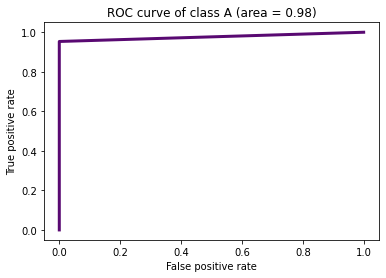

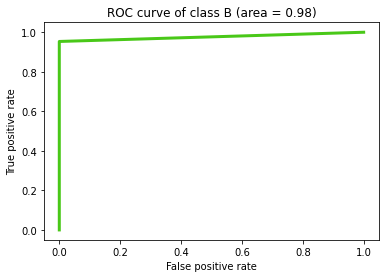

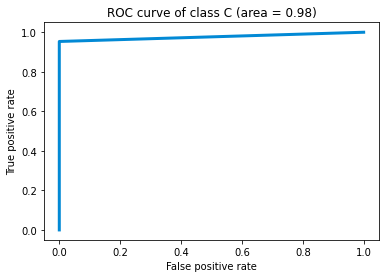

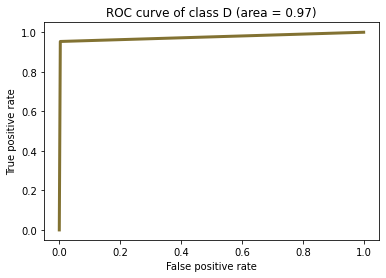

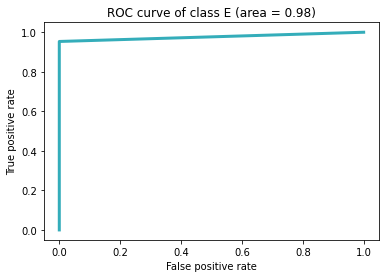

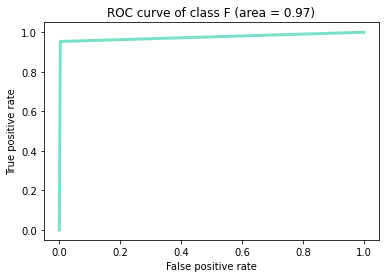

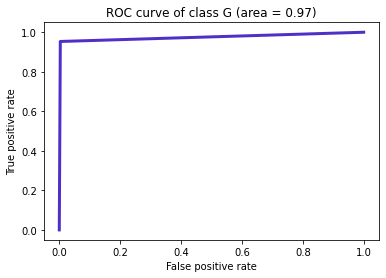

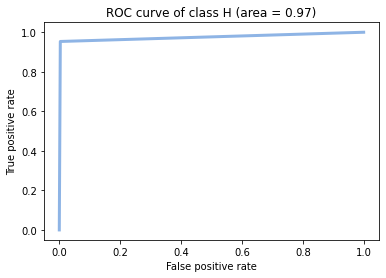

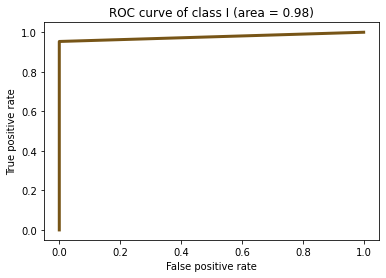

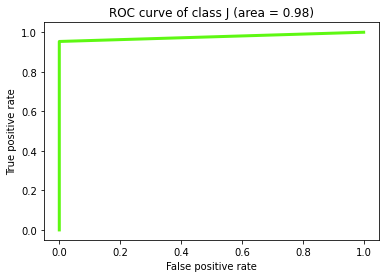

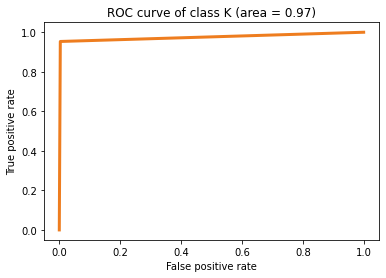

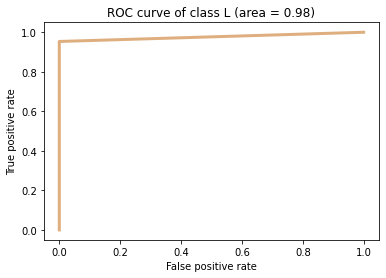

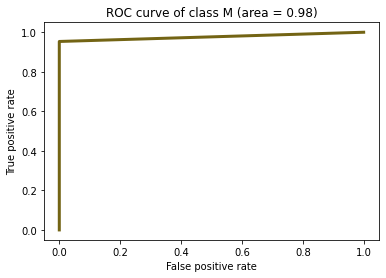

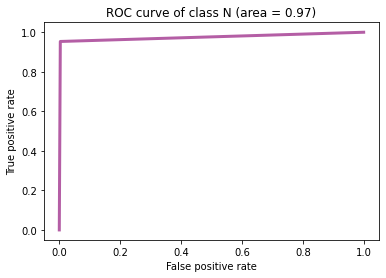

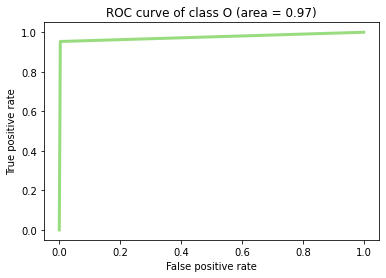

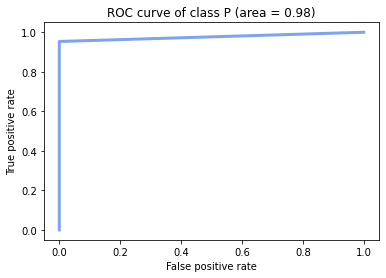

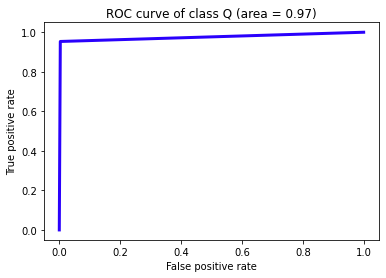

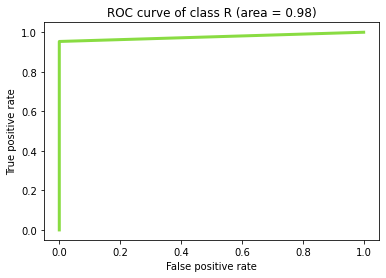

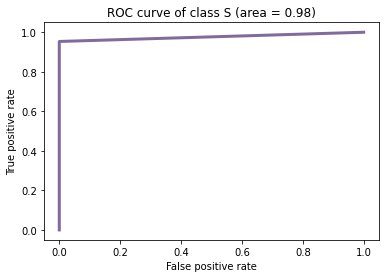

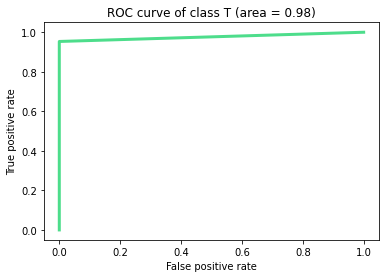

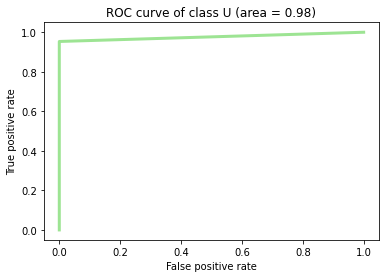

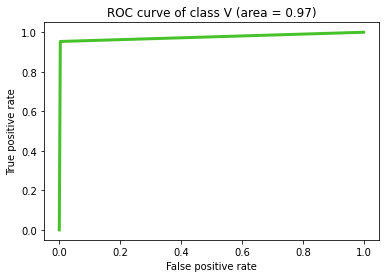

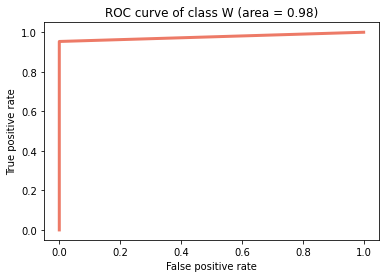

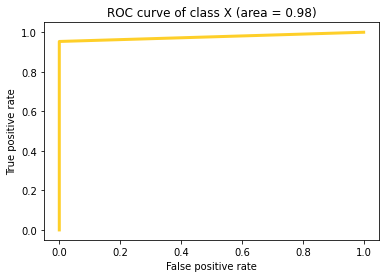

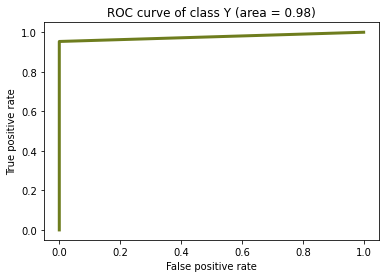

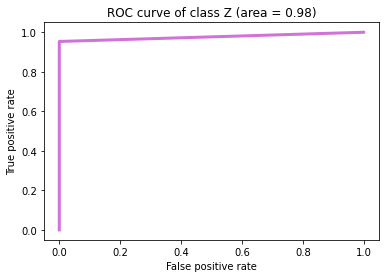

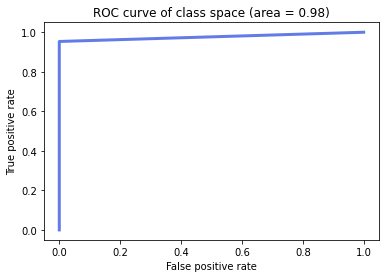

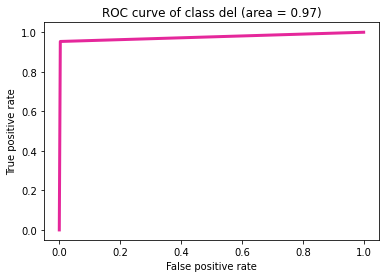

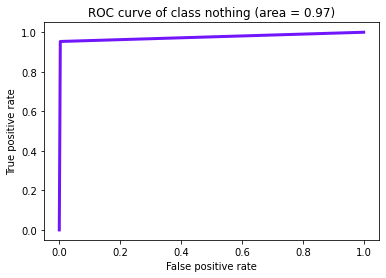

In [0]:
import random

for i in range(29):
    plt.figure(i)
    # plt.plot(fpr[i], tpr[i],
    #         label=f'{i} ROC curve (area = {0:0.2f})'
    #             ''.format(roc_auc[i]),
    #         color='navy', linestyle=':', linewidth=4)
    plt.plot(fpr[i], tpr[i], color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)), lw=3,label='ROC curve of class {0} (area = {1:0.2f})'.format(labels_dict[i], roc_auc[i]), c='blue')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve of class {0} (area = {1:0.2f})'.format(labels_dict[i], roc_auc[i]))

In [0]:
import plotly.graph_objects as go

fig = go.Figure()

for i in range(29):
    fig.add_trace(go.Scatter(x=fpr[i], y=tpr[i],
                        mode='lines',
                        name='ROC curve of class {0} (area = {1:0.2f})'.format(labels_dict[i], roc_auc[i])))

fig.show()